<a href="https://colab.research.google.com/github/AlexNedyalkov/Washington-University-Application-Neural-Networks/blob/master/Module_4_Practice_Keras_Classification_AUC_ROC_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

TensorFlow 2.x selected.
Note: using Google CoLab


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Binary classification is used to create a model that classifies between only two classes. These two classes are often called "positive" and "negative". Consider the following program that uses the wcbreast_wdbc dataset to classify if a breast tumor is cancerous (malignant) or not (benign). 

In [0]:
df = pd.read_csv(    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
                 na_values = ["?", "NA"])

In [0]:
display(df.head())

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [0]:
df.shape

(569, 32)

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [0]:
import math
import scipy.stats as stats

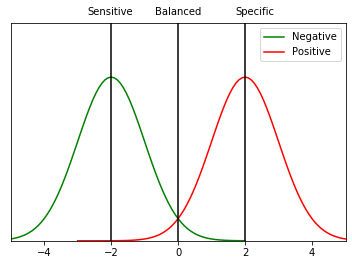

In [0]:
mu1 = -2
mu2 = 2
variance = 1
sigma = math.sqrt(variance)
x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1,color="green")
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1,color="red")
plt.axvline(x=-2,color="black")
plt.axvline(x=0,color="black")
plt.axvline(x=+2,color="black")
plt.text(-2.7,0.55,"Sensitive")
plt.text(-0.7,0.55,"Balanced")
plt.text(1.7,0.55,"Specific")
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Negative','Positive'])
plt.yticks([])
#plt.set_yticklabels([])
plt.show()

In [0]:
x_columns = df.drop("id", axis = 1).drop("diagnosis", axis = 1)

In [0]:
from scipy.stats import zscore

In [0]:
x_columns = x_columns.apply(zscore)

In [11]:
x_columns.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,2.475807e-16,-9.912009e-17,-2.968237e-16,-1.088760e-16,4.426014e-16,1.958988e-16,1.678017e-16,2.185325e-17,1.523874e-16,-5.658430e-17,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [12]:
x = x_columns.values
display(x[:2])

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [13]:
x.shape

(569, 30)

In [0]:
y = df.diagnosis.map({"M":0, "B" : 1}).values

In [15]:
y[:5]

array([0, 0, 0, 0, 0])

In [0]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [0]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [0]:

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)


(426, 30)
(426,)
(143,)
(143, 30)


In [0]:
model = Sequential()

In [0]:
model.add(Dense(100, activation = "relu",input_dim = x_train.shape[1], kernel_initializer='random_normal'))
model.add(Dense(50, activation = "relu", kernel_initializer="random_normal"))
model.add(Dense(25, activation = "relu", kernel_initializer="random_normal"))
model.add(Dense(1, activation = "linear", kernel_initializer="random_normal"))
model.compile(loss = tensorflow.keras.losses.binary_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=["accuracy"])

In [0]:
monitor = EarlyStopping(monitor = "val_loss", min_delta=1e-3, patience = 5, restore_best_weights=True)

In [25]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 426 samples, validate on 143 samples
Epoch 1/1000
426/426 - 1s - loss: 2.7505 - accuracy: 0.3709 - val_loss: 1.9883 - val_accuracy: 0.3776
Epoch 2/1000
426/426 - 0s - loss: 1.5984 - accuracy: 0.3709 - val_loss: 1.1836 - val_accuracy: 0.3776
Epoch 3/1000
426/426 - 0s - loss: 0.8680 - accuracy: 0.4319 - val_loss: 0.5410 - val_accuracy: 0.6923
Epoch 4/1000
426/426 - 0s - loss: 0.3549 - accuracy: 0.8169 - val_loss: 0.1729 - val_accuracy: 0.9301
Epoch 5/1000
426/426 - 0s - loss: 0.2526 - accuracy: 0.9202 - val_loss: 0.1170 - val_accuracy: 0.9510
Epoch 6/1000
426/426 - 0s - loss: 0.1808 - accuracy: 0.9390 - val_loss: 0.0949 - val_accuracy: 0.9650
Epoch 7/1000
426/426 - 0s - loss: 0.1769 - accuracy: 0.9366 - val_loss: 0.1332 - val_accuracy: 0.9231
Epoch 8/1000
426/426 - 0s - loss: 0.1537 - accuracy: 0.9272 - val_loss: 0.1125 - val_accuracy: 0.9441
Epoch 9/1000
426/426 - 0s - loss: 0.1513 - accuracy: 0.9484 - val_loss: 0.0757 - val_accuracy: 0.9510
Epoch 10/1000
426/426 - 0s - loss: 0

In [0]:
pred = model.predict(x_test)

In [27]:
len(pred)

143

In [28]:
np.arange(0, len(pred))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142])

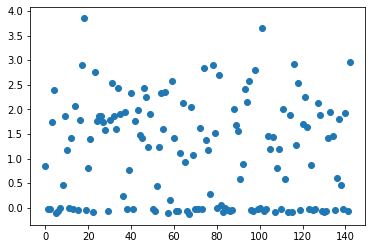

In [29]:
plt.scatter(np.arange(0, len(pred)), pred)

In [0]:
model_sigmoid = Sequential()

In [0]:
model_sigmoid.add(Dense(100, activation = "relu",input_dim = x_train.shape[1], kernel_initializer='random_normal'))
model_sigmoid.add(Dense(50, activation = "relu", kernel_initializer="random_normal"))
model_sigmoid.add(Dense(25, activation = "relu", kernel_initializer="random_normal"))
model_sigmoid.add(Dense(1, activation = "sigmoid", kernel_initializer="random_normal"))
model_sigmoid.compile(loss = tensorflow.keras.losses.binary_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=["accuracy"])

In [32]:
model_sigmoid.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 426 samples, validate on 143 samples
Epoch 1/1000
426/426 - 0s - loss: 0.6817 - accuracy: 0.8756 - val_loss: 0.6550 - val_accuracy: 0.9441
Epoch 2/1000
426/426 - 0s - loss: 0.6069 - accuracy: 0.9319 - val_loss: 0.5010 - val_accuracy: 0.9580
Epoch 3/1000
426/426 - 0s - loss: 0.3927 - accuracy: 0.9343 - val_loss: 0.2214 - val_accuracy: 0.9580
Epoch 4/1000
426/426 - 0s - loss: 0.1794 - accuracy: 0.9460 - val_loss: 0.0906 - val_accuracy: 0.9720
Epoch 5/1000
426/426 - 0s - loss: 0.1063 - accuracy: 0.9648 - val_loss: 0.0623 - val_accuracy: 0.9720
Epoch 6/1000
426/426 - 0s - loss: 0.0820 - accuracy: 0.9742 - val_loss: 0.0538 - val_accuracy: 0.9860
Epoch 7/1000
426/426 - 0s - loss: 0.0728 - accuracy: 0.9789 - val_loss: 0.0488 - val_accuracy: 0.9860
Epoch 8/1000
426/426 - 0s - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.0513 - val_accuracy: 0.9790
Epoch 9/1000
426/426 - 0s - loss: 0.0597 - accuracy: 0.9789 - val_loss: 0.0483 - val_accuracy: 0.9860
Epoch 10/1000
426/426 - 0s - loss: 0

In [0]:
pred_sigmoid = model_sigmoid.predict(x_test)

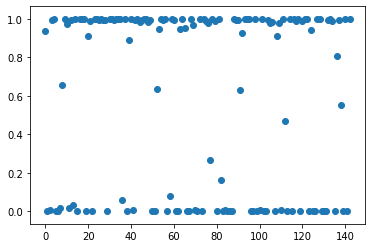

In [34]:
plt.scatter(np.arange(0, len(pred_sigmoid)), pred_sigmoid)

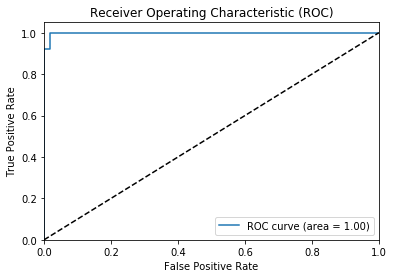

In [35]:
plot_roc(pred_sigmoid,y_test)

### Multiclass Classification Error Metrics

The following sections will examine several metrics for evaluating classification error. The following classification neural network will be used to evaluate.

In [0]:
df2 = pd.read_csv(
        "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
        na_values = ["NA", "?"])

In [37]:
display(df2.head())

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [38]:
df2.shape

(2000, 14)

In [39]:
len(df2.job.unique())

33

In [0]:
# Generate dummies for job
job_dummies = pd.get_dummies(df2.job, prefix = "job")
df2 = pd.concat([df2, job_dummies], axis = 1)
df2.drop("job", axis=1, inplace = True)

In [41]:
df2.shape

(2000, 46)

In [0]:
# Generate dummies for area
area_dummies = pd.get_dummies(df2.area, prefix = "area")
pd.concat([df2, area_dummies], axis = 1)
df2.drop("area", axis = 1, inplace = True)


In [43]:
df2.shape

(2000, 45)

In [44]:
df2.isna().sum()

id                 0
income            59
aspect             0
subscriptions      0
dist_healthy       0
save_rate          0
dist_unhealthy     0
age                0
pop_dense          0
retail_dense       0
crime              0
product            0
job_11             0
job_al             0
job_am             0
job_ax             0
job_bf             0
job_by             0
job_cv             0
job_de             0
job_dz             0
job_e2             0
job_f8             0
job_gj             0
job_gv             0
job_kd             0
job_ke             0
job_kl             0
job_kp             0
job_ks             0
job_kw             0
job_mm             0
job_nb             0
job_nn             0
job_ob             0
job_pe             0
job_po             0
job_pq             0
job_pz             0
job_qp             0
job_qw             0
job_rn             0
job_sa             0
job_vv             0
job_zz             0
dtype: int64

In [0]:
df2.income = df2.income.fillna(value = df2.income.median())

In [46]:
df2.isna().sum()

id                0
income            0
aspect            0
subscriptions     0
dist_healthy      0
save_rate         0
dist_unhealthy    0
age               0
pop_dense         0
retail_dense      0
crime             0
product           0
job_11            0
job_al            0
job_am            0
job_ax            0
job_bf            0
job_by            0
job_cv            0
job_de            0
job_dz            0
job_e2            0
job_f8            0
job_gj            0
job_gv            0
job_kd            0
job_ke            0
job_kl            0
job_kp            0
job_ks            0
job_kw            0
job_mm            0
job_nb            0
job_nn            0
job_ob            0
job_pe            0
job_po            0
job_pq            0
job_pz            0
job_qp            0
job_qw            0
job_rn            0
job_sa            0
job_vv            0
job_zz            0
dtype: int64

In [0]:
# Standardize ranges
df2['income'] = zscore(df2['income'])
df2['aspect'] = zscore(df2['aspect'])
df2['save_rate'] = zscore(df2['save_rate'])
df2['age'] = zscore(df2['age'])
df2['subscriptions'] = zscore(df2['subscriptions'])

In [0]:
# Convert to numpy - Classification
x_columns = df2.columns.drop("id").drop("product")
x = df2[x_columns].values
y_dummies = pd.get_dummies(df2["product"])
products = y_dummies.columns
y = y_dummies.values

In [49]:
df2.describe()

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
count,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,-5.578871e-17,3.011480e-17,-3.661516e-16,9.295306,-2.048361e-17,14.316942,-2.567391e-16,0.879758,0.563258,0.275939,0.02150,0.037500,0.02150,0.00650,0.013500,0.012000,0.003500,0.055000,0.028000,0.011500,0.02100,0.003000,0.004000,0.070500,0.005500,0.067500,0.000500,0.000500,0.023500,0.016000,0.059000,0.046500,0.006000,0.104000,0.009500,0.000500,0.205500,0.094500,0.002000,0.002000,0.001000,0.046500,0.000500
std,577.494589,1.000250e+00,1.000250e+00,1.000250e+00,5.731798,1.000250e+00,8.209951,1.000250e+00,0.076570,0.152759,0.182886,0.14508,0.190031,0.14508,0.08038,0.115431,0.108912,0.059072,0.228037,0.165014,0.106646,0.14342,0.054704,0.063135,0.256052,0.073976,0.250949,0.022361,0.022361,0.151523,0.125506,0.235684,0.210618,0.077246,0.305337,0.097028,0.022361,0.404168,0.292596,0.044688,0.044688,0.031615,0.210618,0.022361
min,1.000000,-3.698464e+00,-1.417904e+00,-1.255928e+00,2.000000,-2.863493e+00,2.160180,-4.546792e+00,0.492126,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,-5.264666e-01,-8.710929e-01,-2.084485e-01,4.937724,-6.971694e-01,7.858578,-4.959572e-01,0.838583,0.472441,0.141712,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.651291e-01,-2.525686e-01,-2.084485e-01,8.065855,-2.845363e-01,12.376985,3.142098e-01,0.889764,0.562992,0.241322,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1500.250000,7.226491e-01,9.755160e-01,8.390315e-01,12.227631,3.859925e-01,19.312772,8.543211e-01,0.933071,0.673228,0.356615,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,3.157229e+00,1.800215e+00,3.981471e+00,33.009306,5.784609e+00,37.052691,1.664488e+00,1.000000,0.972441,0.977276,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
y[:10,]

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [0]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [53]:
x_train.shape

(1500, 43)

In [54]:
y_train.shape

(1500, 7)

In [0]:
model_multi  = Sequential()

In [0]:
model_multi.add(Dense(units = 100, input_dim = x_train.shape[1], activation = "relu", kernel_initializer="random_normal"))
model_multi.add(Dense(50, activation='relu',kernel_initializer='random_normal'))
model_multi.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model_multi.add(Dense(y_train.shape[1], activation="softmax", kernel_initializer="random_normal"))

In [0]:
model_multi.compile(optimizer=tensorflow.keras.optimizers.Adam(), 
                    loss = tensorflow.keras.losses.categorical_crossentropy,
                    metrics = ["accuracy"])

In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [85]:
model_multi.fit(x_train,y_train,validation_data=(x_test, y_test), epochs  = 1000, verbose = 1, callbacks= [monitor])

Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 [==============================] - 1s 359us/sample - loss: 1.5693 - accuracy: 0.4627 - val_loss: 1.1355 - val_accuracy: 0.4980
Epoch 2/1000
1500/1500 [==============================] - 0s 85us/sample - loss: 1.1452 - accuracy: 0.4773 - val_loss: 1.0980 - val_accuracy: 0.5640
Epoch 3/1000
1500/1500 [==============================] - 0s 96us/sample - loss: 1.1007 - accuracy: 0.4900 - val_loss: 1.0414 - val_accuracy: 0.5160
Epoch 4/1000
1500/1500 [==============================] - 0s 85us/sample - loss: 1.0213 - accuracy: 0.5420 - val_loss: 0.9736 - val_accuracy: 0.5700
Epoch 5/1000
1500/1500 [==============================] - 0s 88us/sample - loss: 0.8797 - accuracy: 0.6607 - val_loss: 0.9490 - val_accuracy: 0.5800
Epoch 6/1000
1500/1500 [==============================] - 0s 81us/sample - loss: 0.8039 - accuracy: 0.6793 - val_loss: 0.8212 - val_accuracy: 0.6680
Epoch 7/1000
1500/1500 [==============================] - 

In [86]:
x_test.shape

(500, 43)

In [0]:
pred = model_multi.predict(x_test)

In [88]:
pred[0]

array([7.5877060e-06, 1.3198172e-01, 7.5343442e-01, 1.1297021e-01,
       1.5736525e-03, 3.0289177e-05, 2.0602140e-06], dtype=float32)

In [92]:
pred = np.argmax(pred, axis = 1)
pred

array([2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2,

In [67]:
set(pred)

{0, 1, 2}

In [0]:
np.argmax(y_test[:10], axis = 1)

array([2, 1, 1, 1, 3, 1, 2, 2, 2, 2])

In [94]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
y_compare = np.argmax(y_test, axis = 1)

In [97]:
set(y_compare)

{0, 1, 2, 3, 4, 5, 6}

In [0]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_compare, pred)

0.704

In [104]:
from IPython.display import display
from sklearn import metrics

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model_multi.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

Numpy array of predictions


array([[0.    , 0.132 , 0.7534, 0.113 , 0.0016, 0.    , 0.    ],
       [0.    , 0.6836, 0.3133, 0.0003, 0.0027, 0.0001, 0.    ],
       [0.    , 0.7003, 0.2948, 0.0004, 0.0043, 0.0001, 0.    ],
       [0.    , 0.3011, 0.6806, 0.0158, 0.0024, 0.    , 0.    ],
       [0.    , 0.0416, 0.6776, 0.2805, 0.0003, 0.    , 0.    ]],
      dtype=float32)

As percent probability
[ 0.0008 13.1982 75.3434 11.297   0.1574  0.003   0.0002]
Log loss score: 0.7539110427498817


The log function is useful to penalizing wrong answers.  The following code demonstrates the utility of the log function:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


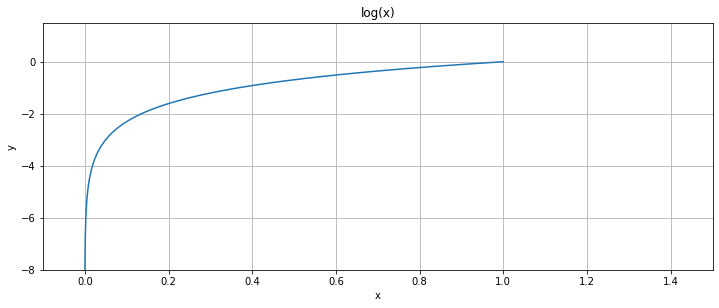

In [106]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

#t = arange(1e-5, 5.0, 0.00001)
#t = arange(1.0, 5.0, 0.00001) # computer scientists
t = arange(0.0, 1.0, 0.00001)  # data     scientists

fig = figure(1,figsize=(12, 10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 1.5))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()

Confusion matrix, without normalization
[[ 21   1   0   0   0   0   0]
 [  7 194  48   0   0   0   0]
 [  0  50 137   0   0   0   0]
 [  0   0  14   0   0   0   0]
 [  0   8   0   0   0   0   0]
 [ 10   6   1   0   0   0   0]
 [  3   0   0   0   0   0   0]]
Normalized confusion matrix
[[0.95 0.05 0.   0.   0.   0.   0.  ]
 [0.03 0.78 0.19 0.   0.   0.   0.  ]
 [0.   0.27 0.73 0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.59 0.35 0.06 0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]]


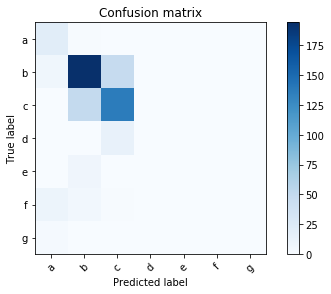

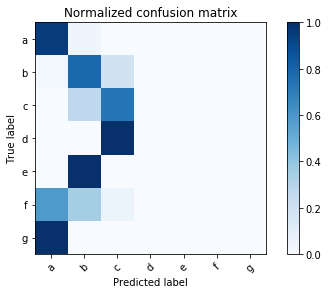

In [107]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, products)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, products, title='Normalized confusion matrix')

plt.show()